# Classify persian news

In [ ]:
import numpy as np

## Load and Preprocess Data


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#!unrar x "/content/drive/My Drive/News.rar" "/content/drive/My Drive/"

## To see head of the dataset

In [ ]:
import pandas as pd 
  
train_df = pd.read_csv('/content/drive/My Drive/News/train.csv',sep='\t',error_bad_lines=False , encoding='utf-8') 
train_df.head()

,link,title,code_news,category,date,text
0,/fa/news/6276899/اسفراین-جولانگاه-مقدونیان-تصا...,اسفراین؛ جولانگاه مقدونیان + تصاویر,کد خبر: ۶۲۷۶۸۹۹,فرهنگی هنری,تاریخ انتشار: ۲۱ مهر ۱۳۹۶ - ۰۷:۰۴,به گزارش خبرنگار حوزه میراث و گردشگری گروه فر...
1,/fa/news/4626291/اجرای-قطعات-سلام-آقا-بدون-انگ...,"اجرای قطعات ""سلام آقا"" بدون انگیزه مالی و با ا...",کد خبر: ۴۶۲۶۲۹۱,فرهنگی هنری,تاریخ انتشار: ۱۹ آبان ۱۳۹۲ - ۱۰:۰۰,به گزارش حوزه موسیقی باشگاه خبرنگاران، مهدی ی...
2,/fa/news/4632846/حکایت-سیاریحون-از-نهضت-میرزا-...,"حکایت ""سیاریحون"" از نهضت میرزا کوچک خان جنگلی ...",کد خبر: ۴۶۳۲۸۴۶,فرهنگی هنری,تاریخ انتشار: ۲۵ آبان ۱۳۹۲ - ۱۳:۴۵,به گزارش حوزه تئاتر باشگاه خبرنگاران به نقل ا...
3,/fa/news/5058438/گفتگو-با-کارگردان-سریال-شهید-...,گفتگو با کارگردان سریال شهید مدرس/قدرت بیان فو...,کد خبر: ۵۰۵۸۴۳۸,فرهنگی هنری,تاریخ انتشار: ۱۰ آذر ۱۳۹۳ - ۱۰:۵۴,به گزارش خبرنگار رادیو تلویزیون باشگاه خبرنگا...
4,/fa/news/6668241/گزارش-تصویری-مراسم-عزاداری-شب...,گزارش تصویری مراسم عزاداری شب ششم محرم ۹۷/ حضو...,کد خبر: ۶۶۶۸۲۴۱,فرهنگی هنری,تاریخ انتشار: ۲۵ شهريور ۱۳۹۷ - ۱۰:۳۵,به گزارش خبرنگار تکیه حسینی گروه فرهنگی باشگا...


## Distrubution of samples per class

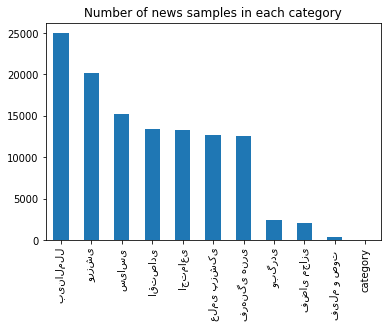

In [ ]:
train_df['category'].value_counts().sort_values(ascending=False).plot(kind='bar', 
                                                                title='Number of news samples in each category')

In [ ]:
x_train_l = []
y_train_l = []
for index,row in train_df.iterrows():
  x_train_l.append(str(row['title']) + '.' + str(row['text']))
  y_train_l.append(row['category'])

In [ ]:
print(len(x_train_l))
print(len(y_train_l))

117192
117192


In [ ]:
print(x_train_l[5])
print(y_train_l[5])

نیازمند نگرشی جدید در تبلیغات فیلم‌های کودکان هستیم. به گزارش حوزه سینما گروه فرهنگی باشگاه خبرنگاران جوان به نقل از ستاد اطلاع‌رسانی جشنواره بین‌المللی فیلم‌های کودکان و نوجوانان؛ امیر عابدی مدیر بخش مواد تبلیغی سی‌امین جشنواره فیلم‌های کودکان و نوجوانان گفت: این بخش در زمینه‌های عکس، پوستر، تیزر و آنونس بستری را فراهم کرده است که در یکی از گالری‌های اصفهان و همزمان در سالن‌های سینما با مرکزیت جشنواره همه آثار این دوستان عرضه شود و هچنین امسال یکی از اولویت‌هایی که در این بخش خواهیم داشت، توجه به کمپین‌های تبلیغاتی است، یعنی فیلم‌هایی که احیانا در این کمپین‌ها وجود داشته باشند، بررسی کرده و می‌بینیم و به سمت راهکارهای تشویقی در این زمینه حرکت خواهیم کرد. وی با اشاره به بحث تبلیغات در سینما گفت: در حال حاضر کار انفرادی در زمینه تبلیغات خیلی جوابگو نخواهد بود و همه باید به این گستره توجه داشته باشند و پیش از کلید خوردن فیلم برنامه‌ریزی‌ها برای تبلیغات فیلم انجام شود و یک اتاق فکر شکل بگیرد و شاخصه‌ها و روش‌های تبلیغاتی را در نظر گرفته و تعریف کنند و روش های تبلیغاتی مدنظر خود را بررسی ک

## Clean the dataset, delete stopwords, non-persian characters, substitute numbers with character N,...


In [ ]:
#!pip install hazm

In [ ]:
from hazm import *
import re

def clean(t):

  t = re.sub(r'[^\w\d.؟\s]+','',t)
  t = re.sub(r'[a-zA-Z]+','',t)
  t = re.sub(r'\d+' , ' N ' , t)

  t = re.sub(r'_' , '' , t)
  t = re.sub(r'\.+' , '.' , t)

  normalizer = Normalizer()
  text = normalizer.normalize(t) 
  return text

In [ ]:
# test
sentences = "20 نفر به ستاد فراخونده: شدند/] ! بهترین فصل، بهار+_ 1,433 است ... "
clean(sentences)

' N نفر به ستاد فراخونده شدند بهترین فصل بهار N است. '

## Tokenizing

In [ ]:
tokenized_data =[word_tokenize(clean(x)) for x in x_train_l]

In [ ]:
print("{} data for training ".format(
    len(tokenized_data)))

train_list=[]
for i in range(len(tokenized_data)):
    train_list.extend(tokenized_data[i])
print('\n{} tokens for training '.format(
    len(train_list)))

print('\n{} unique tokens for training '.format(
    len(set(train_list))))

117192 data for training 

33315315 tokens for training 

307626 unique tokens for training 


## Create dictionary of dataset vocabukaries

In [ ]:
def count_words(tokenized_sentences):
    
    word_counts = {}
    
    # Loop through each sentence
    for sentence in tokenized_sentences:
        
        # Go through each token in the sentence
        for token in sentence: 
            # If the token is not in the dictionary yet
            if not token in word_counts.keys():
                word_counts[token] = 1
            
            # If the token is already in the dictionary
            else:
                word_counts[token] += 1

    return word_counts

In [ ]:
# test
tokenized_sentences =[tokenized_data[1250]]
count_words(tokenized_sentences)

{'.': 8,
 'N': 3,
 'آبرامز': 3,
 'آرنت': 1,
 'آلیاس': 1,
 'آمریکا': 1,
 'ارائه': 1,
 'از': 6,
 'است': 1,
 'استیون': 1,
 'اسپیلبرگ': 1,
 'اعلام': 2,
 'ام': 1,
 'امی': 1,
 'انقلاب': 1,
 'ای': 1,
 'این': 2,
 'اینکه': 1,
 'با': 1,
 'باشگاه': 1,
 'بر': 1,
 'برای': 1,
 'برنده': 1,
 'بعد': 1,
 'به': 4,
 'بی': 1,
 'تا': 2,
 'تمام': 1,
 'تهیهکنندگان': 1,
 'تکیه': 1,
 'جایزه': 1,
 'جفری': 1,
 'جنگ': 4,
 'جی': 4,
 'جیکوب': 1,
 'حالا': 1,
 'حدیث\u200cها': 1,
 'حرف': 1,
 'خبرنگاران': 1,
 'خریده_است': 1,
 'خواهد_زد': 1,
 'دارد': 2,
 'در': 1,
 'دست': 1,
 'دلار': 1,
 'دهد': 1,
 'دی': 1,
 'دیزنی': 2,
 'را': 5,
 'رد': 1,
 'روی': 1,
 'زیادی': 1,
 'سال': 1,
 'ستارگان': 4,
 'سکان': 1,
 'شد': 1,
 'شدهاست': 1,
 'شرکت': 1,
 'صندلی': 1,
 'فرینج': 1,
 'فضا': 1,
 'فیلم': 1,
 'فیلمسازی': 2,
 'فیلم\u200cهای': 1,
 'قرار': 1,
 'قسمت': 4,
 'قصد': 1,
 'لاست': 1,
 'لوکاس': 1,
 'مایکل': 1,
 'متیو': 1,
 'مجموعه': 1,
 'مطرح': 1,
 'میز': 1,
 'میلیارد': 1,
 'نقل': 1,
 'نویسندگی': 1,
 'نیز': 1,
 'هدایت': 1,
 'هفتم': 2,
 'همچ

In [ ]:
word_counts = count_words(tokenized_data)

In [ ]:
print("Number of all tokens:")
print(sum(word_counts.values()))
print("\nNumber of unique tokens:")
print(len(word_counts))

Number of all tokens:
33315315

Number of unique tokens:
307626


In [ ]:
from collections import Counter
def get_words_with_threshold_rank_frequency(tokenized, rank_threshold):
    closed_vocab = {}
    
    # Get the word counts of the tokenized sentences
    # Use the function that has been defined earlier to count the words
    word_counts = count_words(tokenized)
    closed_voc=Counter(word_counts).most_common(rank_threshold)
    for a, b in closed_voc: 
        closed_vocab[a] = b
    return closed_vocab

In [ ]:
#test
tmp_closed_vocab = get_words_with_threshold_rank_frequency(tokenized_data, 5)
print(f"\nClosed vocabulary with rank frequency:")
print(tmp_closed_vocab)


Closed vocabulary with rank frequency:
{'و': 1412851, 'در': 1190281, '.': 1114247, 'به': 1002197, 'از': 743423}


## Handle Out of Vocabulary words

In [ ]:
def replace_oov_words_by_unk(tokenized, vocabulary, unknown_token="<unk>"):
    
    replaced_tokenized = []
    
    # Go through each sentence
    for sentence in tokenized:
        
        replaced_sentence = []

        for token in sentence:
            # Check if the token is in the closed vocabulary
            if token in vocabulary.keys(): 
                replaced_sentence.append(token)
            else:
                # otherwise, append the unknown token instead
                replaced_sentence.append(unknown_token)

        replaced_tokenized.append(replaced_sentence)
        
    return replaced_tokenized

## Preprocess the whole dataset

In [ ]:
def preprocess_data(train_list, rank_threshold):
    """
    Returns:
        Tuple of
        - training data with low frequent words replaced by "<unk>"
        - vocabulary of words with higher rank frequency (10000)
    """
    vocabulary = get_words_with_threshold_rank_frequency(train_list , rank_threshold)
    train_data_replaced = replace_oov_words_by_unk(train_list, vocabulary, unknown_token="<unk>")
  
    return train_data_replaced, vocabulary

In [ ]:
train_data_processed, vocabulary = preprocess_data(tokenized_data,rank_threshold=10000)

In [ ]:
print("First preprocessed training sample:")
print(train_data_processed[100])
print()

print("Most frequent vocabularies:")
print(vocabulary)
print()
print("Size of vocabulary:", len(vocabulary))

First preprocessed training sample:
['اعدام', 'شیخ', 'نمر', 'برای', 'عربستان', 'بسیار', 'گران', 'تمام', 'میشود', '.', 'آیتالله', 'محسن', '<unk>', 'عضو', 'جامعه', 'مدرسین', 'حوزه', 'علمیه', 'قم', 'در', 'گفتگو', 'با', 'خبرنگار', 'حوزه', 'قرآن', 'و', 'عترت', 'گروه', 'فرهنگی', 'باشگاه', 'خبرنگاران', 'جوان', 'اظهار', 'داشت', 'در', 'اسلام', 'از', 'گذشته', 'تاکنون', 'علمای', 'بزرگی', 'وجود', 'داشتهاند', 'که', 'در', 'برابر', 'ظلم', 'و', 'استکبار', '<unk>', 'که', '<unk>', 'و', 'تحمل', '<unk>', 'زندان', 'تبعید', 'و', 'حتی', 'شهادت', 'برای', 'آنها', 'یک', 'افتخار', 'بزرگ', 'است', 'و', 'آیتالله', 'شیخ', 'نمر', 'نمونهای', 'از', 'آنهاست', '.', 'آیتالله', 'محسن', '<unk>', 'عضو', 'جامعه', 'مدرسین', 'حوزه', 'علمیه', 'قم', 'در', 'گفتگو', 'با', 'خبرنگار', 'حوزه', 'قرآن', 'و', 'عترت', 'گروه', 'فرهنگی', 'باشگاه', 'خبرنگاران', 'جوان', 'اظهار', 'داشت', 'در', 'اسلام', 'از', 'گذشته', 'تاکنون', 'علمای', 'بزرگی', 'وجود', 'داشتهاند', 'که', 'در', 'برابر', 'ظلم', 'و', 'استکبار', '<unk>', 'که', '<unk>', 'و', 'تحمل',

## Get most frequent word dictionary


In [ ]:
with open('/content/drive/My Drive/News/most_frequent.txt', 'w') as f:
  most_freq=sorted(vocabulary.items(), key=lambda x: x[1], reverse=True)
  for t in most_freq:
    f.write(t[0]+'\n')

In [ ]:
print("Percentage of token coverage :")
print(sum(vocabulary.values())/sum(word_counts.values())*100)

Percentage of token coverage :
93.28308317060787


## Create Word2Ind and Ind2word dictionaries

In [ ]:
def tokenize(vocabs):

    words = sorted(list(vocabs.keys()))
    n = len(words)
    idx = 1

    word2Ind = {}
    Ind2word = {}
    for k in words:
        word2Ind[k] = idx
        Ind2word[idx] = k
        idx += 1

    return word2Ind, Ind2word

In [ ]:
word2Index , Index2word = tokenize(vocabulary)

In [ ]:
V = len(word2Index)
print("Size of vocabulary: ", V)

Size of vocabulary:  10000


# examples of word to index and index to word mapping

In [ ]:
print("Index of the word 'ترامپ' :  ",word2Index['ترامپ'] )
print("Word which has index 2736:  ",Index2word[2736] )

Index of the word 'ترامپ' :   2233
Word which has index 2736:   جایگزینی


## Function to convert words to related indices

In [ ]:
def tokenize2(s):
  print("Indexes for the sentence :"+s+"\n")
  inds=[word2Index[w] for w in s.split()]
  return inds

s= 'ترامپ برای جایگزینی ریاست جمهوری به ایران سفر کرد'
print(tokenize2(s))

Indexes for the sentence :ترامپ برای جایگزینی ریاست جمهوری به ایران سفر کرد

[2233, 1564, 2736, 4314, 2845, 1835, 1225, 4742, 9380]


In [ ]:
inds=[word2Index[w] for w in s.split()]
print("words for the indexes :",inds)
ws=[Index2word[i] for i in inds]
print(ws)
print('The complete sentence : \n' + ' '.join(ws))

words for the indexes : [2233, 1564, 2736, 4314, 2845, 1835, 1225, 4742, 9380]
['ترامپ', 'برای', 'جایگزینی', 'ریاست', 'جمهوری', 'به', 'ایران', 'سفر', 'کرد']
The complete sentence : 
ترامپ برای جایگزینی ریاست جمهوری به ایران سفر کرد


In [ ]:
import pickle

with open('word2Index.pkl', 'wb') as fid:
     pickle.dump(word2Index, fid)

In [ ]:
with open('index2Word.pkl', 'wb') as fid:
     pickle.dump(Index2word, fid)

In [ ]:
Index2word

{1: '.',
 2: 'N',
 3: '؟',
 4: 'آ',
 5: 'آئین',
 6: 'آئیننامه',
 7: 'آب',
 8: 'آباد',
 9: 'آبادان',
 10: 'آبادانی',
 11: 'آبادی',
 12: 'آبان',
 13: 'آبانماه',
 14: 'آبرسانی',
 15: 'آبروی',
 16: 'آبزیان',
 17: 'آبشار',
 18: 'آبه',
 19: 'آبهای',
 20: 'آبی',
 21: 'آبیاری',
 22: 'آبی\u200cها',
 23: 'آب\u200cهای',
 24: 'آتش',
 25: 'آتشبس',
 26: 'آتشسوزی',
 27: 'آتشنشانی',
 28: 'آتلانتیک',
 29: 'آتن',
 30: 'آتی',
 31: 'آثار',
 32: 'آثارشان',
 33: 'آثاری',
 34: 'آجیل',
 35: 'آحاد',
 36: 'آخر',
 37: 'آخرت',
 38: 'آخرین',
 39: 'آخوندی',
 40: 'آداب',
 41: 'آدرس',
 42: 'آدم',
 43: 'آدمها',
 44: 'آدمهای',
 45: 'آدمی',
 46: 'آذر',
 47: 'آذربایجان',
 48: 'آذرماه',
 49: 'آذری',
 50: 'آذین',
 51: 'آر',
 52: 'آرا',
 53: 'آراء',
 54: 'آرام',
 55: 'آرامش',
 56: 'آرامی',
 57: 'آرای',
 58: 'آرایش',
 59: 'آرایشی',
 60: 'آرتروز',
 61: 'آرد',
 62: 'آرزو',
 63: 'آرزوهای',
 64: 'آرزوی',
 65: 'آرسنال',
 66: 'آرش',
 67: 'آرشیو',
 68: 'آرم',
 69: 'آرمان',
 70: 'آرمانهای',
 71: 'آرمان\u200cهای',
 72: 'آرژانتین',
 7

## Get the mean of sequence lengths

In [ ]:
mean_word_size = np.mean([len(x) for x in train_data_processed])
print('Mean news size of words : ')
print(int(mean_word_size))

Mean news size of words : 
284


In [ ]:
#train_data = [x for x in train_data_processed if len(x)<mean_word_size]
train_data = []
classes = []
for i , x in enumerate(train_data_processed) :
  if len(x)<mean_word_size:
    if y_train_l[i] is not np.nan and y_train_l[i] != 'category':
      train_data.append(x)
      classes.append(y_train_l[i])

In [ ]:
print("Number of samples with word size less than mean word size :")
print(len(train_data))

Number of samples with word size less than mean word size :
83912


# Padding

In [ ]:
train_data_padding = [x + ((int(mean_word_size) - len(x)) * ' PAD').split() for x in train_data]

In [ ]:
len(train_data_padding[20])

284

In [ ]:
#test
print(np.mean([len(x) for x in train_data_padding]))

284.0


## 8 : Vectorize (Word2Vec (CBOW))

In [ ]:
def initialize_model(N,V, random_seed=1):

    np.random.seed(random_seed)
    
    W1 = np.random.rand(N,V)
    W2 = np.random.rand(V,N)
    b1 = np.random.rand(N,1)
    b2 = np.random.rand(V,1)

    return W1, W2, b1, b2

In [ ]:
def softmax(z):
 
    # Calculate yhat (softmax)
    s=np.sum([np.exp(zi) for zi in z] , axis =0)
    yhat = np.exp(z)/s    
    return yhat

In [ ]:
def forward_prop(x, W1, W2, b1, b2):
   
    # Calculate h
    h = np.dot(W1,x) + b1
    # Apply the relu on h (store result in h)
    h2 = h.copy()
    h2[h2 < 0] = 0
    h=h2
    # Calculate z
    z = np.dot(W2,h)+b2
    
    return z, h

## compute_cost: cross-entropy cost function


In [ ]:
def compute_cost(y, yhat, batch_size):
    # cost function 
    logprobs = np.multiply(np.log(yhat),y) + np.multiply(np.log(1 - yhat), 1 - y)
    cost = - 1/batch_size * np.sum(logprobs)
    cost = np.squeeze(cost)
    return cost

# Training the model CBOW (Backpropagation)

In [ ]:
def back_prop(x, yhat, y, h, W1, W2, b1, b2, batch_size):
   
    # Compute l1 as W2^T (Yhat - Y)
    # Re-use it whenever you see W2^T (Yhat - Y) used to compute a gradient
    l1 = np.dot(W2.T ,(yhat - y))
    # Apply relu to l1
    l11 = l1.copy()
    l11[l11 < 0] = 0
    l1=l11
    # Compute the gradient of W1
    grad_W1 = np.dot(l1,x.T)/batch_size
    grad_W2 = np.dot((yhat-y),h.T)/batch_size
    grad_b1 = np.sum(l1,axis=1,keepdims = True)/batch_size
    grad_b2 = np.sum(yhat-y,axis=1,keepdims = True)/batch_size    
    return grad_W1, grad_W2, grad_b1, grad_b2

In [ ]:
def gradient_descent(data, word2Ind, N, V, num_iters, alpha=0.03):

    W1, W2, b1, b2 = initialize_model(N,V, random_seed=282)
    batch_size = 128
    iters = 0
    C = 2
    for x, y in get_batches(data, word2Ind, V, C, batch_size):
        # Get z and h
        z, h = forward_prop(x, W1, W2, b1, b2)
        # Get yhat
        yhat = softmax(z)
        # Get cost
        cost = compute_cost(y, yhat, batch_size)
        if ( (iters+1) % 10 == 0):
            print(f"iters: {iters + 1} cost: {cost:.6f}")
        # Get gradients
        grad_W1, grad_W2, grad_b1, grad_b2 = back_prop(x, yhat, y, h, W1, W2, b1, b2, batch_size)
        
        # Update weights and biases
        W1 -= alpha*grad_W1
        W2 -= alpha*grad_W2
        b1 -= alpha*grad_b1
        b2 -= alpha*grad_b2 
                
        iters += 1 
        if iters == num_iters: 
            break
        if iters % 100 == 0:
            alpha *= 0.66
            
    return W1, W2, b1, b2

# create context and target for Word2Vec

In [ ]:
def get_vectors(data, word2Ind, V, C):
    i = C
    while True:
        y = np.zeros(V)
        x = np.zeros(V)
        center_word = data[i]
        y[word2Ind[center_word]] = 1
        context_words = data[(i - C):i] + data[(i+1):(i+C+1)]
        num_ctx_words = len(context_words)
        for idx, freq in pack_idx_with_frequency(context_words, word2Ind):
            x[idx] = freq/num_ctx_words
        yield x, y
        i += 1
        if i >= len(data):
            print('i is being set to 0')
            i = 0

In [ ]:
def get_batches(data, word2Ind, V, C, batch_size):
    batch_x = []
    batch_y = []
    for x, y in get_vectors(data, word2Ind, V, C):
        while len(batch_x) < batch_size:
            batch_x.append(x)
            batch_y.append(y)
        else:
            yield np.array(batch_x).T, np.array(batch_y).T
            batch = []

In [ ]:
def pack_idx_with_frequency(context_words, word2Ind):
    freq_dict = defaultdict(int)
    for word in context_words:
        freq_dict[word] += 1
    idxs = get_idx(context_words, word2Ind)
    packed = []
    for i in range(len(idxs)):
        idx = idxs[i]
        freq = freq_dict[context_words[i]]
        packed.append((idx, freq))
    return packed

In [ ]:
def get_idx(words, word2Ind):
    idx = []
    for word in words:
        idx = idx + [word2Ind[word]]
    return idx

## Train the model

In [ ]:
# test the function
C = 2
N = 50

word2Index['<unk>'] = len(word2Index)-1
V = len(word2Index)
num_iters = 150
print("Call gradient_descent")

import functools
import operator
from collections import defaultdict

flat_list = functools.reduce(operator.iconcat, train_data_processed , [])

W1, W2, b1, b2 = gradient_descent(flat_list , word2Index, N, V, num_iters)

Call gradient_descent
iters: 10 cost: 0.644764
iters: 20 cost: 0.104737
iters: 30 cost: 0.056522
iters: 40 cost: 0.038684
iters: 50 cost: 0.029401
iters: 60 cost: 0.023711
iters: 70 cost: 0.019866
iters: 80 cost: 0.017095
iters: 90 cost: 0.015002
iters: 100 cost: 0.013366
iters: 110 cost: 0.012427
iters: 120 cost: 0.011649
iters: 130 cost: 0.010962
iters: 140 cost: 0.010352
iters: 150 cost: 0.009806


#Visualising CBOW vectorizing

In [ ]:
# visualizing the word vectors here
from matplotlib import pyplot
%config InlineBackend.figure_format = 'svg'
words = ['ترامپ', 'دلار','تهران','بنزین', 'فوتبال','استقلال','سگ',
         'برجام','بورس','نفت','جوان','تجاری','پرسپولیس','تاریخ','لیگ','باشگاه','یورو','رئیس','ارز','پول']

embs = (W1.T + W2)/2.0
 
# given a list of words and the embeddings, it returns a matrix with all the embeddings
idx = [word2Index[word] for word in words]
X = embs[idx, :]
print(X.shape, idx)  # X.shape:  Number of words of dimension N each 

(20, 50) [2233, 3762, 2524, 1819, 6058, 600, 4899, 1576, 1899, 8058, 2904, 2141, 8899, 2078, 6396, 1389, 9967, 3956, 494, 9015]


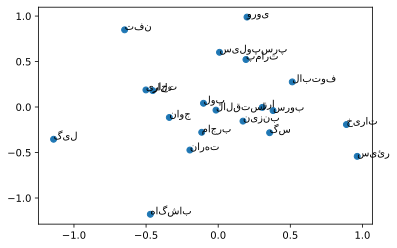

In [ ]:
from scipy import linalg

def compute_pca(data, n_components=2):
    m, n = data.shape
    data -= data.mean(axis=0)
    R = np.cov(data, rowvar=False)
    evals, evecs = linalg.eigh(R)
    idx = np.argsort(evals)[::-1]

    evecs = evecs[:, idx]
    evals = evals[idx]
    evecs = evecs[:, :n_components]
    return np.dot(evecs.T, data.T).T

result= compute_pca(X, 2)
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    w=[]
    for j in range(len(word)):
      w.append(word[len(word)-1-j])
    w=''.join(w)
    pyplot.annotate(w, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# Classification
# Naive Bayes

In [ ]:
train_data_comp = []
classes_comp = []
for i , x in enumerate(tokenized_data) :
  if len(x)<mean_word_size:
    if y_train_l[i] is not np.nan and y_train_l[i] != 'category':
      train_data_comp.append(x)
      classes_comp.append(y_train_l[i])   

In [ ]:
len(train_data_comp)

83912

In [ ]:
len(classes_comp)

83912

In [ ]:
classes_comp[10]

'فرهنگی هنری'

# A dictionary for classes

In [ ]:
classes_dict ={}
class_set = set(classes)
c = 0
for i,x in enumerate(class_set):
  classes_dict[x] = c
  c=c+1

In [ ]:
classes_dict

{'اجتماعی': 4,
 'اقتصادی': 3,
 'بین\u200cالملل': 1,
 'سیاسی': 0,
 'علمی پزشکی': 2,
 'فرهنگی هنری': 7,
 'فضای مجازی': 5,
 'فیلم و صوت ': 9,
 'وب\u200cگردی': 8,
 'ورزشی': 6}

In [ ]:
classes_num = [classes_dict[x] for x in classes]
#test
classes_num[0]

7

In [ ]:
def count_word_in_classes(result, x_list , ys):

    for y, text in zip(ys, x_list):
        for word in text:
            # defining the key, which is the word and label tuple
            pair = (word,y)
            if pair in result:
                result[pair] += 1
            else:
                result[pair] = 1

    return result

## Calculate log priors and loglikelihood and apply smoothing

In [ ]:
def train_naive_bayes(train_x, train_y):

    word_in_class = count_word_in_classes({}, train_data , classes_num)
    loglikelihood = {}
    p = {}
    logprior = []

    # calculate V, the number of unique words in the vocabulary
    vocab = set([pair[0] for pair in word_in_class.keys()])
    V = len(vocab)

    Ns = [0]*10
    Ds = [0]*10
    for pair in word_in_class.keys():
        label = pair[1]
        Ds[label] += 1
        Ns[label] += word_in_class.get(pair,0)

    print('Sample numbers of 10 classes as a list:')
    print(Ds)
    print('\nVocabulary numbers of classes as a list:')
    print(Ns)
    # Calculate logprior
    D = len(train_x)
    print('\nPrior probability of 10 classes :')
    print([Ds[i]/D for i in range(len(set(classes)))])
    logpriors = [np.log(Ds[i]/D) for i in range(len(set(classes)))]

    # For each word in the vocabulary...
    for word in vocab:
        # get the class frequency of the word
        class_freqs = [word_in_class.get((word,i),0) for i in range(len(set(classes)))]

        # calculate the probability that each word is corresponding to each class
        # smoothing
        p_w = [(class_freqs[i]+1)/(Ns[i]+V) for i in range(len(set(classes)))]

        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w)
        p[word] = p_w

    return logpriors , loglikelihood , p

## Probabilities calculated by naive bayes model

In [ ]:
#word_in_classes = count_word_in_classes({}, train_data , classes_num)

In [ ]:
logpriors, loglikelihood , probs = train_naive_bayes(train_data, classes_num)
print('\nlogpriors of 10 classes as a list')
print(logpriors)
#print(len(loglikelihood))

Sample numbers of 10 classes as a list:
[9281, 9149, 8823, 8253, 9343, 6005, 8456, 9301, 5972, 2826]

Vocabulary numbers of classes as a list:
[1190316, 2361055, 1056632, 896711, 1230070, 184106, 1567081, 1211357, 88169, 36805]

Prior probability of 10 classes :
[0.11060396605968158, 0.10903088950328917, 0.10514586709886548, 0.0983530365144437, 0.11134283535132043, 0.07156306606921536, 0.100772237582229, 0.1108423109924683, 0.07116979693011727, 0.0336781390027648]

logpriors of 10 classes as a list
[-2.201799331046047, -2.2161240469619043, -2.252406682419335, -2.3191918600487558, -2.1951412308484843, -2.637176175127356, -2.2948923820913665, -2.199646709398973, -2.642686750982359, -3.3909063463969673]


## Predict by the model

In [ ]:
def predict(text):
  prediction = 0
  llhs = [loglikelihood.get(t,0) for t in text.split()]
  llhs.append(logpriors)
  pr_list = np.sum(llhs,axis = 0)
  pr = np.max(pr_list)
  for idx,x in enumerate(pr_list):
    if x == pr:
      prediction = idx
      break
  return prediction

## To test the learned model

In [ ]:
print('Class prediction is :\n')
p = predict('ترامپ در اجلاس سران به ')
print(p)
print('\nThe predicted class is :\n')
for c,i in classes_dict.items():
  if i == p:
    print(c)

Class prediction is :

1

The predicted class is :

بین‌الملل


## Evaluation part

In [ ]:
test_df = pd.read_csv('/content/drive/My Drive/News/test.csv',sep='\t',error_bad_lines=False , encoding='utf-8') 

In [ ]:
x_test_l = []
y_test_l = []
for index,row in test_df.iterrows():
  x_test_l.append(str(row['title']) + '.' + str(row['text']))
  y_test_l.append(row['category'])

In [ ]:
tokenized_test_data =[word_tokenize(clean(x)) for x in x_test_l]

In [ ]:
test_data_processed, test_vocabulary = preprocess_data(tokenized_test_data,rank_threshold=10000)

In [ ]:
len(test_data_processed)

21104

In [ ]:
test_data = []
test_classes = []
for i , x in enumerate(test_data_processed) :
  if len(x)<mean_word_size and len(x)> 2 :
    if y_test_l[i] is not np.nan and y_test_l[i] != 'category':
      test_data.append(x)
      test_classes.append(y_test_l[i])

In [ ]:
len(test_data)

15007

In [ ]:
len(test_classes)

15007

In [ ]:
test_classes_num = [classes_dict[x] for x in test_classes]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate(test_list,y_list):

  y_pred = []
  for doc in test_list:
    p = predict(' '.join(doc))
    y_pred.append(p)

  acc = accuracy_score(y_list,y_pred)
  prec = precision_score(y_list,y_pred, average = None)
  rec = recall_score(y_list,y_pred, average = None)
  f1 = f1_score(y_list,y_pred, average = None)
  conf_m = confusion_matrix (y_list,y_pred)

  return y_pred , acc , prec , rec , f1 , conf_m

In [ ]:
#test
y_pred , accuracy , precision , recall , f1_s , confusion_m = evaluate(test_data,test_classes_num)

In [ ]:
print('Accuracy is : ' + str(accuracy))
print('\nPrecision is : ' + str(precision))
print('\nRecall is : ' + str(recall))
print('\nF1 score is : ' + str(f1_s))
print('\nConfusion Matrix :')
print(confusion_m)

Accuracy is : 0.8340774305324182

Precision is : [0.79174368 0.92465961 0.82987552 0.83675937 0.81233062 0.35967302
 0.97119056 0.82079343 0.34751773 0.20454545]

Recall is : [0.79174368 0.90041249 0.78226858 0.7954023  0.69790454 0.69473684
 0.91617551 0.88626292 0.7122093  0.32142857]

F1 score is : [0.79174368 0.91237498 0.80536913 0.81555687 0.75078272 0.47396768
 0.94288121 0.85227273 0.46711153 0.25      ]

Confusion Matrix :
[[1285  126   24   50   50    4    4   51   28    1]
 [  75 3056   17   99   17   42   21   11   54    2]
 [  49   11 1200   35   56   49   15   32   77   10]
 [  63   34   38 1384   91   37   13   28   38   14]
 [  77   22  113   58 1199   29   13   71  133    3]
 [   6    2    1    3    7  132    2    4    3   30]
 [  33   30   27   15   25   19 2798   43   62    2]
 [  27    9   18    7   16    5    7 1200   63    2]
 [   8   15    8    2   15   22    5   18  245    6]
 [   0    0    0    1    0   28    3    4    2   18]]


# ROC

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

test_classes_num_bin = label_binarize(test_classes_num, classes=[0,1,2,3,4,5,6,7,8,9])
y_pred_bin = label_binarize(y_pred, classes=[0,1,2,3,4,5,6,7,8,9])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(set(classes_num))):
    fpr[i], tpr[i], _ = roc_curve(test_classes_num_bin[: ,i], y_pred_bin[: ,i] , pos_label = None)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_classes_num_bin.ravel(), y_pred_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
roc_auc

{0: 0.8832448249332757,
 1: 0.9394855023232298,
 2: 0.8820049195885614,
 3: 0.8875255256972403,
 4: 0.8385301164205675,
 5: 0.8394383407394778,
 6: 0.9546158220329339,
 7: 0.9335365015193527,
 8: 0.8404189115460684,
 9: 0.6583733051778667,
 'micro': 0.9078207947402325}

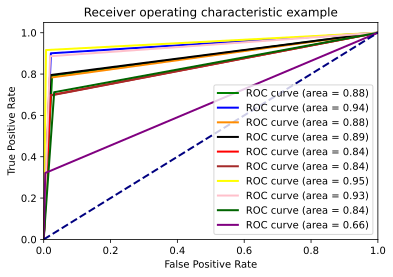

In [ ]:
plt.figure()
lw = 2

plt.plot(fpr[0], tpr[0], color='green',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='blue',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot(fpr[3], tpr[3], color='black',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[3])
plt.plot(fpr[4], tpr[4], color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[4])
plt.plot(fpr[5], tpr[5], color='brown',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[5])
plt.plot(fpr[6], tpr[6], color='yellow',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[6])
plt.plot(fpr[7], tpr[7], color='pink',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[7])
plt.plot(fpr[8], tpr[8], color='darkgreen',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[8])
plt.plot(fpr[9], tpr[9], color='purple',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[9])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

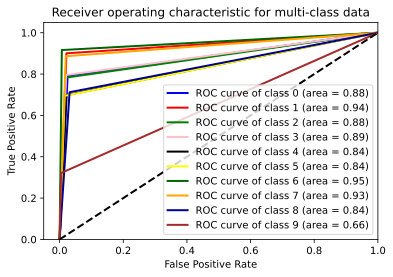

In [ ]:
for i in range(len(set(classes_num))):
    fpr[i], tpr[i], _ = roc_curve(test_classes_num_bin[: ,i], y_pred_bin[: ,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','pink','black','yellow','darkgreen','orange','darkblue','brown'])
for i, color in zip(range(len(set(classes_num))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

# LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
MAX_NB_WORDS = 10000
MAX_SEQUENCE_LENGTH = int(mean_word_size)
EMBEDDING_DIM = 100
epochs = 5
batch_size = 64

In [ ]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(train_data_processed)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 10001 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(train_data)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH , padding='post')
print('Shape of data tensor:', X.shape)

Shape of data tensor: (83912, 284)


In [ ]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
Y = encoder.fit_transform(classes_num)

print('Shape of label tensor:', Y.shape)

Shape of label tensor: (83912, 10)


In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(50, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 284, 100)          1000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 284, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 10)                510       
Total params: 1,030,710
Trainable params: 1,030,710
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from sklearn.model_selection import train_test_split
epochs = 10
batch_size = 128


X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y, test_size = 0.20, random_state = 42)

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_data=(X_valid, Y_valid),callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
525/525 [==============================] - 412s 786ms/step - loss: 2.0234 - accuracy: 0.2178 - val_loss: 2.0201 - val_accuracy: 0.2220
Epoch 2/10
525/525 [==============================] - 412s 785ms/step - loss: 1.9513 - accuracy: 0.2349 - val_loss: 1.9850 - val_accuracy: 0.2293
Epoch 3/10
455/525 [=========================>....] - ETA: 53s - loss: 2.0161 - accuracy: 0.2205